<a href="https://colab.research.google.com/github/Paradox-3/Indian-Sentiment-analysis-after-3-lockdown-using-Tweets/blob/master/Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Data Preprocessing

### 1.1.Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import csv
import re
import matplotlib.pyplot as plt
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings


In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
#nltk.download('wordnet')

In [4]:
#nltk.download('punkt')

In [5]:
#nltk.download('averaged_perceptron_tagger') 

In [6]:
df = pd.read_csv('hashtag_data.csv', parse_dates=['date'],encoding='utf-8-sig')
totallen = len(df)
print('###############################################################')
print('#   Inetial Total length of data set : ',totallen,'           #')
print('###############################################################')
df.head()

###############################################################
#   Inetial Total length of data set :  124384            #
###############################################################


id      conversation_id  ...  trans_src trans_dest
0  1262787913311387649  1262787913311387649  ...        NaN        NaN
1  1262787786152620040  1262787786152620040  ...        NaN        NaN
2  1262787219498000384  1262787219498000384  ...        NaN        NaN
3  1262786998592434176  1262786998592434176  ...        NaN        NaN
4  1262786970163441669  1262786970163441669  ...        NaN        NaN

[5 rows x 34 columns]

### 1.2.Loading the input dataset

In [7]:
np.shape(df)

(124384, 34)

### 1.3.Droping unnecessary columns from the data

In [8]:
to_drop=['conversation_id','timezone','name','place','mentions','urls','photos',
         'cashtags','link','retweet','quote_url','video','near','geo','source',
         'user_rt_id','user_rt','retweet_id','reply_to','retweet_date','translate','trans_src',
         'trans_dest']

print("columns to drop : ", to_drop)

df.drop(to_drop, inplace = True, axis = 1)
print('Number of columns dropped = ', len(to_drop))

columns to drop :  ['conversation_id', 'timezone', 'name', 'place', 'mentions', 'urls', 'photos', 'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest']
Number of columns dropped =  23


In [9]:
np.shape(df)

(124384, 11)

### 1.4.Drop "NA"

In [10]:
df = df.dropna()
df = df.reset_index(drop = True)
print('length : ', len(df))
print('Actual length : ', totallen)

length :  124384
Actual length :  124384


In [11]:
np.shape(df)

(124384, 11)

### 1.5.Drop Records of beyond dates {past 23-3-2020}

In [12]:
df.drop(df[df['date'] < pd.to_datetime("22-3-2020")].index , inplace=True)
df = df.reset_index(drop=True)
print('length : ', len(df))
print('Actual length : ', totallen)

length :  116939
Actual length :  124384


In [13]:
np.shape(df)

(116939, 11)

### 1.6.Drop Duplicate Records

In [14]:
df = df.drop_duplicates()

In [15]:
np.shape(df)

(116010, 11)

In [16]:
df.reset_index(drop = True)

id  ...                                           hashtags
0       1262787913311387649  ...  ['#lockdownindia', '#lockdown', '#indiafightsc...
1       1262787786152620040  ...                   ['#lockdownindia', '#locldown4']
2       1262787219498000384  ...  ['#covid_19', '#covid_19sa', '#covid_19india',...
3       1262786998592434176  ...  ['#lockdownindia', '#roastchallenge', '#journa...
4       1262786970163441669  ...  ['#covid19', '#coronavirus', '#patiencechallen...
...                     ...  ...                                                ...
116005  1241523659275149313  ...                                   ['#coronaindia']
116006  1241521898871230464  ...                                   ['#coronaindia']
116007  1241519647280766979  ...  ['#corona', '#patients', '#healthcare', '#coro...
116008  1241515925381283840  ...  ['#painting', '#illustration', '#saraswatiarts...
116009  1241515182171598851  ...  ['#covidー19', '#covid19pt', '#coronaindia', '#...

[116010 rows x 11 columns]

In [17]:
print('length : ',len(df))
print('Actual length : ', totallen)

length :  116010
Actual length :  124384


In [18]:
np.shape(df)

(116010, 11)

### 1.7.Convert into lowercase

In [19]:
df['tweet'] = df['tweet'].str.lower()

In [20]:
df

id  ...                                           hashtags
0       1262787913311387649  ...  ['#lockdownindia', '#lockdown', '#indiafightsc...
1       1262787786152620040  ...                   ['#lockdownindia', '#locldown4']
2       1262787219498000384  ...  ['#covid_19', '#covid_19sa', '#covid_19india',...
3       1262786998592434176  ...  ['#lockdownindia', '#roastchallenge', '#journa...
4       1262786970163441669  ...  ['#covid19', '#coronavirus', '#patiencechallen...
...                     ...  ...                                                ...
116934  1241523659275149313  ...                                   ['#coronaindia']
116935  1241521898871230464  ...                                   ['#coronaindia']
116936  1241519647280766979  ...  ['#corona', '#patients', '#healthcare', '#coro...
116937  1241515925381283840  ...  ['#painting', '#illustration', '#saraswatiarts...
116938  1241515182171598851  ...  ['#covidー19', '#covid19pt', '#coronaindia', '#...

[116010 rows x 11 columns]

### 1.8.Remove Numbers

In [21]:
df['tweet'] = df['tweet'].str.replace('\d+', '')

In [22]:
a = '123aefedbsedsevdxe2vds34v'

In [23]:
len(a)

25

In [24]:
for i in range(10):
  a=a.replace(str(i), '')

In [25]:
a

'aefedbsedsevdxevdsv'

In [26]:
df

id  ...                                           hashtags
0       1262787913311387649  ...  ['#lockdownindia', '#lockdown', '#indiafightsc...
1       1262787786152620040  ...                   ['#lockdownindia', '#locldown4']
2       1262787219498000384  ...  ['#covid_19', '#covid_19sa', '#covid_19india',...
3       1262786998592434176  ...  ['#lockdownindia', '#roastchallenge', '#journa...
4       1262786970163441669  ...  ['#covid19', '#coronavirus', '#patiencechallen...
...                     ...  ...                                                ...
116934  1241523659275149313  ...                                   ['#coronaindia']
116935  1241521898871230464  ...                                   ['#coronaindia']
116936  1241519647280766979  ...  ['#corona', '#patients', '#healthcare', '#coro...
116937  1241515925381283840  ...  ['#painting', '#illustration', '#saraswatiarts...
116938  1241515182171598851  ...  ['#covidー19', '#covid19pt', '#coronaindia', '#...

[116010 rows x 11 columns]

### 1.9.Remove Single Character

In [27]:
df['tweet'] = df['tweet'].replace(re.compile(r"(^| ).( |$)"), "")

In [28]:
df

id  ...                                           hashtags
0       1262787913311387649  ...  ['#lockdownindia', '#lockdown', '#indiafightsc...
1       1262787786152620040  ...                   ['#lockdownindia', '#locldown4']
2       1262787219498000384  ...  ['#covid_19', '#covid_19sa', '#covid_19india',...
3       1262786998592434176  ...  ['#lockdownindia', '#roastchallenge', '#journa...
4       1262786970163441669  ...  ['#covid19', '#coronavirus', '#patiencechallen...
...                     ...  ...                                                ...
116934  1241523659275149313  ...                                   ['#coronaindia']
116935  1241521898871230464  ...                                   ['#coronaindia']
116936  1241519647280766979  ...  ['#corona', '#patients', '#healthcare', '#coro...
116937  1241515925381283840  ...  ['#painting', '#illustration', '#saraswatiarts...
116938  1241515182171598851  ...  ['#covidー19', '#covid19pt', '#coronaindia', '#...

[116010 rows x 11 columns]

### 1.10.Remove hyperlinks

In [29]:
df['tweet'] = df['tweet'].replace(re.compile(r'((www\.[\S]+)|(https?://[\S]+))'),"")

In [30]:
df

id  ...                                           hashtags
0       1262787913311387649  ...  ['#lockdownindia', '#lockdown', '#indiafightsc...
1       1262787786152620040  ...                   ['#lockdownindia', '#locldown4']
2       1262787219498000384  ...  ['#covid_19', '#covid_19sa', '#covid_19india',...
3       1262786998592434176  ...  ['#lockdownindia', '#roastchallenge', '#journa...
4       1262786970163441669  ...  ['#covid19', '#coronavirus', '#patiencechallen...
...                     ...  ...                                                ...
116934  1241523659275149313  ...                                   ['#coronaindia']
116935  1241521898871230464  ...                                   ['#coronaindia']
116936  1241519647280766979  ...  ['#corona', '#patients', '#healthcare', '#coro...
116937  1241515925381283840  ...  ['#painting', '#illustration', '#saraswatiarts...
116938  1241515182171598851  ...  ['#covidー19', '#covid19pt', '#coronaindia', '#...

[116010 rows x 11 columns]

### 1.11.Remove Punchuations & special chars

In [31]:
df['tweet'] = df['tweet'].str.replace('[^\w\s]',' ').str.replace('\s\s+', '')

In [32]:
df

id  ...                                           hashtags
0       1262787913311387649  ...  ['#lockdownindia', '#lockdown', '#indiafightsc...
1       1262787786152620040  ...                   ['#lockdownindia', '#locldown4']
2       1262787219498000384  ...  ['#covid_19', '#covid_19sa', '#covid_19india',...
3       1262786998592434176  ...  ['#lockdownindia', '#roastchallenge', '#journa...
4       1262786970163441669  ...  ['#covid19', '#coronavirus', '#patiencechallen...
...                     ...  ...                                                ...
116934  1241523659275149313  ...                                   ['#coronaindia']
116935  1241521898871230464  ...                                   ['#coronaindia']
116936  1241519647280766979  ...  ['#corona', '#patients', '#healthcare', '#coro...
116937  1241515925381283840  ...  ['#painting', '#illustration', '#saraswatiarts...
116938  1241515182171598851  ...  ['#covidー19', '#covid19pt', '#coronaindia', '#...

[116010 rows x 11 columns]

### 1.12.Remove Stopwords

In [33]:
stop = stopwords.words('english')
df['tweet'] = df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

### 1.13.Remove Non-English words

In [34]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [35]:
english_word = set(nltk.corpus.words.words())

In [36]:
df['tweet'] = df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word in (english_word)]))

In [37]:
df

id  ...                                           hashtags
0       1262787913311387649  ...  ['#lockdownindia', '#lockdown', '#indiafightsc...
1       1262787786152620040  ...                   ['#lockdownindia', '#locldown4']
2       1262787219498000384  ...  ['#covid_19', '#covid_19sa', '#covid_19india',...
3       1262786998592434176  ...  ['#lockdownindia', '#roastchallenge', '#journa...
4       1262786970163441669  ...  ['#covid19', '#coronavirus', '#patiencechallen...
...                     ...  ...                                                ...
116934  1241523659275149313  ...                                   ['#coronaindia']
116935  1241521898871230464  ...                                   ['#coronaindia']
116936  1241519647280766979  ...  ['#corona', '#patients', '#healthcare', '#coro...
116937  1241515925381283840  ...  ['#painting', '#illustration', '#saraswatiarts...
116938  1241515182171598851  ...  ['#covidー19', '#covid19pt', '#coronaindia', '#...

[116010 rows x 11 columns]

### 1.13.Remove Extra Spaces

In [38]:
df['tweet']=df['tweet'].str.strip()
df['tweet'] = df['tweet'].replace(re.compile(r"(^| ).( |$)"), " ")

In [39]:
df

id  ...                                           hashtags
0       1262787913311387649  ...  ['#lockdownindia', '#lockdown', '#indiafightsc...
1       1262787786152620040  ...                   ['#lockdownindia', '#locldown4']
2       1262787219498000384  ...  ['#covid_19', '#covid_19sa', '#covid_19india',...
3       1262786998592434176  ...  ['#lockdownindia', '#roastchallenge', '#journa...
4       1262786970163441669  ...  ['#covid19', '#coronavirus', '#patiencechallen...
...                     ...  ...                                                ...
116934  1241523659275149313  ...                                   ['#coronaindia']
116935  1241521898871230464  ...                                   ['#coronaindia']
116936  1241519647280766979  ...  ['#corona', '#patients', '#healthcare', '#coro...
116937  1241515925381283840  ...  ['#painting', '#illustration', '#saraswatiarts...
116938  1241515182171598851  ...  ['#covidー19', '#covid19pt', '#coronaindia', '#...

[116010 rows x 11 columns]

### 1.15.Remove wordlength <3

In [40]:
df.drop(df[df['tweet'].str.count(" ") < 3].index , inplace=True)

In [41]:
df = df.reset_index(drop=True)

In [42]:
df

id  ...                                           hashtags
0      1262787913311387649  ...  ['#lockdownindia', '#lockdown', '#indiafightsc...
1      1262787786152620040  ...                   ['#lockdownindia', '#locldown4']
2      1262787219498000384  ...  ['#covid_19', '#covid_19sa', '#covid_19india',...
3      1262786970163441669  ...  ['#covid19', '#coronavirus', '#patiencechallen...
4      1262786603023400965  ...                                 ['#lockdownindia']
...                    ...  ...                                                ...
76026  1241530451149422593  ...           ['#coronaviruspandemic', '#coronaindia']
76027  1241529559041871872  ...  ['#stop_corona', '#coronavirus', '#coronaoutbr...
76028  1241528663134396416  ...  ['#coronaindia', '#coronavirusoutbreakindia', ...
76029  1241526109734424576  ...  ['#coronastopkarona', '#coronachainscare', '#c...
76030  1241519647280766979  ...  ['#corona', '#patients', '#healthcare', '#coro...

[76031 rows x 11 columns]

In [43]:
np.shape(df)

(76031, 11)

### 1.16.Tokenize Text

In [44]:
tokenized_tweet = df.tweet.apply(lambda x: x.split())

In [45]:
tokenized_tweet.head()

0    [drama, flick, comes, keep, high, keep, hit, s...
1                            [naam, hi, sab, unlocked]
2    [corona, virus, overcome, stress, make, pic, t...
3                  [fight, best, doctor, degree, good]
4    [bring, attention, stop, audit, happening, man...
Name: tweet, dtype: object

### 1.17.Stemming

In [46]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [drama, flick, come, keep, high, keep, hit, su...
1                              [naam, hi, sab, unlock]
2    [corona, viru, overcom, stress, make, pic, twi...
3                   [fight, best, doctor, degre, good]
4    [bring, attent, stop, audit, happen, mani, rem...
Name: tweet, dtype: object

In [47]:
np.shape(df)

(76031, 11)

In [48]:
df

id  ...                                           hashtags
0      1262787913311387649  ...  ['#lockdownindia', '#lockdown', '#indiafightsc...
1      1262787786152620040  ...                   ['#lockdownindia', '#locldown4']
2      1262787219498000384  ...  ['#covid_19', '#covid_19sa', '#covid_19india',...
3      1262786970163441669  ...  ['#covid19', '#coronavirus', '#patiencechallen...
4      1262786603023400965  ...                                 ['#lockdownindia']
...                    ...  ...                                                ...
76026  1241530451149422593  ...           ['#coronaviruspandemic', '#coronaindia']
76027  1241529559041871872  ...  ['#stop_corona', '#coronavirus', '#coronaoutbr...
76028  1241528663134396416  ...  ['#coronaindia', '#coronavirusoutbreakindia', ...
76029  1241526109734424576  ...  ['#coronastopkarona', '#coronachainscare', '#c...
76030  1241519647280766979  ...  ['#corona', '#patients', '#healthcare', '#coro...

[76031 rows x 11 columns]

### lematization

In [50]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [51]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
tokenized_tweet.head()

0    [drama, flick, come, keep, high, keep, hit, su...
1                              [naam, hi, sab, unlock]
2    [corona, viru, overcom, stress, make, pic, twi...
3                   [fight, best, doctor, degre, good]
4    [bring, attent, stop, audit, happen, mani, rem...
Name: tweet, dtype: object

In [52]:
df

id  ...                                           hashtags
0      1262787913311387649  ...  ['#lockdownindia', '#lockdown', '#indiafightsc...
1      1262787786152620040  ...                   ['#lockdownindia', '#locldown4']
2      1262787219498000384  ...  ['#covid_19', '#covid_19sa', '#covid_19india',...
3      1262786970163441669  ...  ['#covid19', '#coronavirus', '#patiencechallen...
4      1262786603023400965  ...                                 ['#lockdownindia']
...                    ...  ...                                                ...
76026  1241530451149422593  ...           ['#coronaviruspandemic', '#coronaindia']
76027  1241529559041871872  ...  ['#stop_corona', '#coronavirus', '#coronaoutbr...
76028  1241528663134396416  ...  ['#coronaindia', '#coronavirusoutbreakindia', ...
76029  1241526109734424576  ...  ['#coronastopkarona', '#coronachainscare', '#c...
76030  1241519647280766979  ...  ['#corona', '#patients', '#healthcare', '#coro...

[76031 rows x 11 columns]

### Most frequeent words 

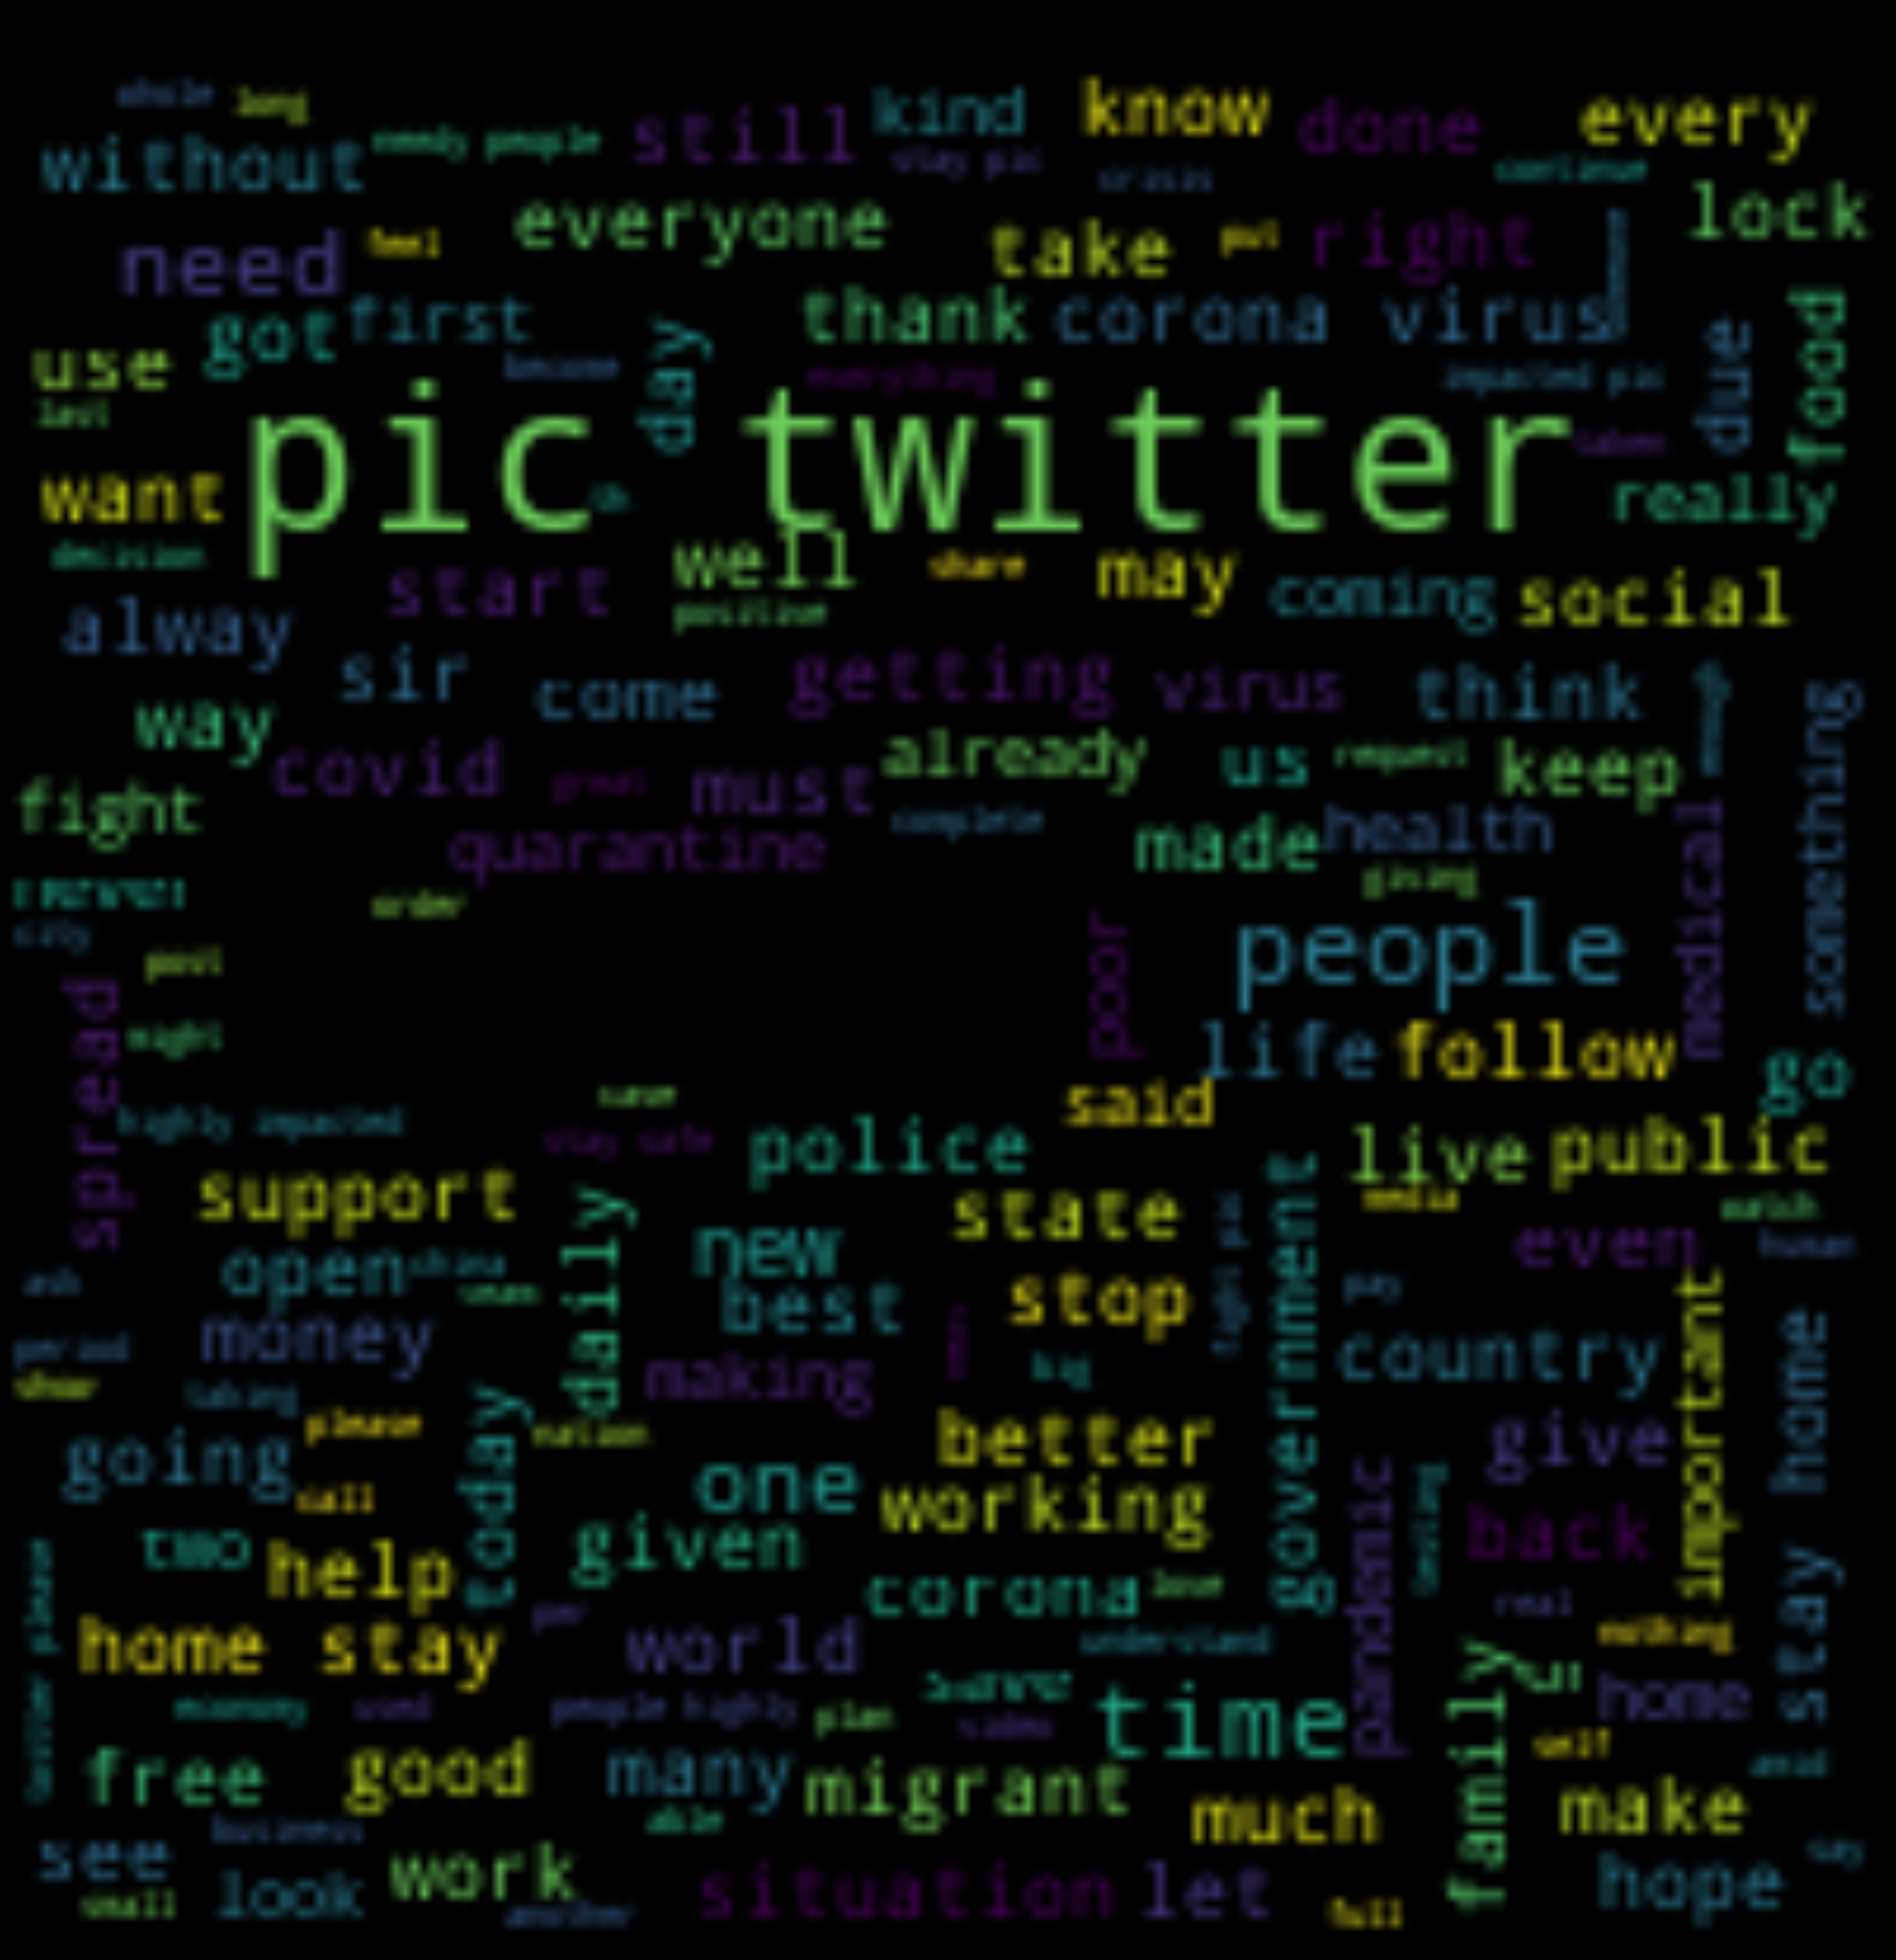

In [54]:
from PIL import Image
all_words = ' '.join([text for text in df['tweet']]) 
from wordcloud import WordCloud

mask = np.array(Image.open('in.png'))


#Run the following to generate your wordcloud
def PlotWordCloud(words, title):
    wordcloud = WordCloud(width = 2000, height = 2000, background_color="black" ,mask=mask
                ).generate(words)                       
    # plot the WordCloud image                        
    plt.figure(figsize = (40, 40),facecolor='k') 
    plt.imshow(wordcloud,interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title, fontsize=100)
    plt.show() 
PlotWordCloud(all_words, 'Trending Topics in Tweets')

### Saving Cleaned Data

In [55]:
df.to_csv('preprocessed_data.csv', index=False, encoding="utf-8")

In [56]:
np.shape(df)

(76031, 11)

In [57]:
df

id  ...                                           hashtags
0      1262787913311387649  ...  ['#lockdownindia', '#lockdown', '#indiafightsc...
1      1262787786152620040  ...                   ['#lockdownindia', '#locldown4']
2      1262787219498000384  ...  ['#covid_19', '#covid_19sa', '#covid_19india',...
3      1262786970163441669  ...  ['#covid19', '#coronavirus', '#patiencechallen...
4      1262786603023400965  ...                                 ['#lockdownindia']
...                    ...  ...                                                ...
76026  1241530451149422593  ...           ['#coronaviruspandemic', '#coronaindia']
76027  1241529559041871872  ...  ['#stop_corona', '#coronavirus', '#coronaoutbr...
76028  1241528663134396416  ...  ['#coronaindia', '#coronavirusoutbreakindia', ...
76029  1241526109734424576  ...  ['#coronastopkarona', '#coronachainscare', '#c...
76030  1241519647280766979  ...  ['#corona', '#patients', '#healthcare', '#coro...

[76031 rows x 11 columns]

# Data Labelling

In [62]:
!pip install twython

In [63]:
import twython

In [64]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [65]:
analyser = sid

In [66]:
import pandas as pd
import numpy as np
import csv
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#analyser = SentimentIntensityAnalyzer()
df = pd.read_csv('preprocessed_data.csv')
#reset index after dropping
df = df.reset_index(drop=True)
#function to assign polarity of sentiment -1, 0 and 1
def polararity_gen(row):
    text = row['tweet']
    score=analyser.polarity_scores(text)['compound']
    pl = 0
    if score > 0.05:
        pl= 1
    elif score <= 0.0 and text.count(" ") > 3:#-0.05:
        pl= -1
    elif score >= 0 and score <= 0.05 :
        pl= 0   
    return pl

df['p_score']=df.apply(polararity_gen,axis=1)

total=df['p_score'].count()
p=df[df['p_score']== 1].count()
nt=df[df['p_score']== 0].count()
n=df[df['p_score']== -1].count()
print(df.head())
print("Positive Sentiment : {:0.2f}%".format((p['p_score']/total)*100))
print("Neutral Sentiment : {:0.2f}%".format((nt['p_score']/total)*100))
print("Negative Sentiment : {:0.2f}%".format((n['p_score']/total)*100))
df.to_csv('sentiment.csv', index=False, encoding="utf-8")
print("Data Saved in sentiment.csv file")

                    id  ...  p_score
0  1262787913311387649  ...       -1
1  1262787786152620040  ...        0
2  1262787219498000384  ...       -1
3  1262786970163441669  ...        1
4  1262786603023400965  ...       -1

[5 rows x 12 columns]
Positive Sentiment : 43.48%
Neutral Sentiment : 13.05%
Negative Sentiment : 43.47%
Data Saved in sentiment.csv file


# Model Building

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [68]:
df = pd.read_csv('sentiment.csv')
print("Columns in the original dataset:\n")
df.columns

Columns in the original dataset:



Index(['id', 'created_at', 'date', 'time', 'user_id', 'username', 'tweet',
       'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'p_score'],
      dtype='object')

In [69]:
np.shape(df)

(76031, 12)

In [70]:
from sklearn.linear_model import LogisticRegression

X = df['tweet']
y = df['p_score']
one_hot_encoded_label = pd.get_dummies(y)
print(one_hot_encoded_label.head())

   -1   0   1
0   1   0   0
1   0   1   0
2   1   0   0
3   0   0   1
4   1   0   0


In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

print("percentage of the X_train data:{:0.2f}%".format(len(X_train)/len(df)*100))
print("percentage of the X_test data:{:0.2f}%".format(len(X_test)/len(df)*100))
print("percentage of the y_train data:{:0.2f}%".format(len(y_train)/len(df)*100))
print("percentage of the y_test data:{:0.2f}%".format(len(y_test)/len(df)*100))

percentage of the X_train data:75.00%
percentage of the X_test data:25.00%
percentage of the y_train data:75.00%
percentage of the y_test data:25.00%


In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(min_df=5).fit(X_train)
print("Features Length ", len(vect.get_feature_names()))
X_train_vectorized = vect.transform(X_train)
feature_names = np.array(vect.get_feature_names())
sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()

print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest tfidf: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

X_train_vectorized = vect.transform(X_train)

Features Length  5204
Smallest tfidf:
['plentiful' 'toxin' 'tortured' 'governmental' 'signature' 'bias'
 'volatility' 'infant' 'criminally' 'sequential']

Largest tfidf: 
['effective' 'quarantine' 'fighting' 'set' 'environment' 'dumb' 'breath'
 'locked' 'train' 'national']


In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
c_val =[0.2,0.75, 1, 2, 3, 4, 5, 10,15,20,25]

iter=0
acc_vect=[]
for i in range(3):
    acc_val=[]
    for c in c_val:
        
        X = df['tweet']
        y = df['p_score']
        one_hot_encoded_label = pd.get_dummies(y)
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
        from sklearn.feature_extraction.text import TfidfVectorizer
        vect = TfidfVectorizer(min_df=5).fit(X_train)
        X_train_vectorized = vect.transform(X_train)
        feature_names = np.array(vect.get_feature_names())
        sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()
        X_train_vectorized = vect.transform(X_train)
        
        model = LogisticRegression(C=c,solver='saga')
        model.fit(X_train_vectorized, y_train)
        #print ("Accuracy for C=%s: %s" % (c, accuracy_score(y_test, model.predict(vect.transform(X_test)))))
        acc_val.append(round(accuracy_score(y_test, model.predict(vect.transform(X_test))),2))
        
    df['p_score']=model.predict(vect.transform(df.tweet[0:]))
    print("After : ",i+1,"run ", "Accuracy : ",acc_val[-1]*100,"%")
    acc_vect.append(acc_val)
sorted_coef_index = model.coef_[0].argsort()
#after training model
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))
print("First two tweets prediction ", model.predict(vect.transform(df.tweet[0:2])))
print("Final Accuracy :{:0.2f}".format(acc_val[-1]*100))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


After :  1 run  Accuracy :  86.0 %
After :  2 run  Accuracy :  94.0 %
After :  3 run  Accuracy :  97.0 %
Smallest Coefs:
['best' 'positive' 'great' 'safe' 'care' 'super' 'please' 'free' 'kindly'
 'relief']

Largest Coefs: 
['crisis' 'war' 'cancer' 'infected' 'worst' 'poor' 'death' 'kill' 'hatred'
 'negative']
First two tweets prediction  [-1  0]
Final Accuracy :97.00


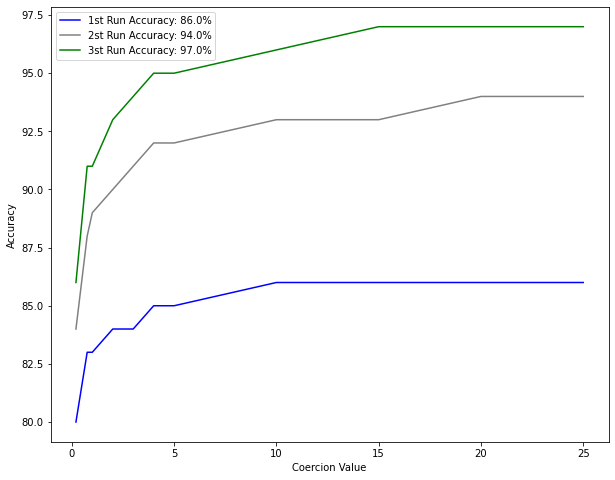

In [74]:
plt.figure(figsize=(10,8))
plt.plot(c_val, [element * 100 for element in acc_vect[0]],color="blue",label='1st Run Accuracy: '+str(acc_vect[0][-1]*100)+"%")
plt.plot(c_val, [element * 100 for element in acc_vect[1]],color="grey",label='2st Run Accuracy: '+str(acc_vect[1][-1]*100)+"%")
plt.plot(c_val, [element * 100 for element in acc_vect[2]],color="green",label='3st Run Accuracy: '+str(acc_vect[2][-1]*100)+"%")
plt.xlabel('Coercion Value')
plt.legend()
plt.ylabel('Accuracy')
plt.show()

[[8815  133   68]
 [ 285 1539   17]
 [  46   18 8087]]


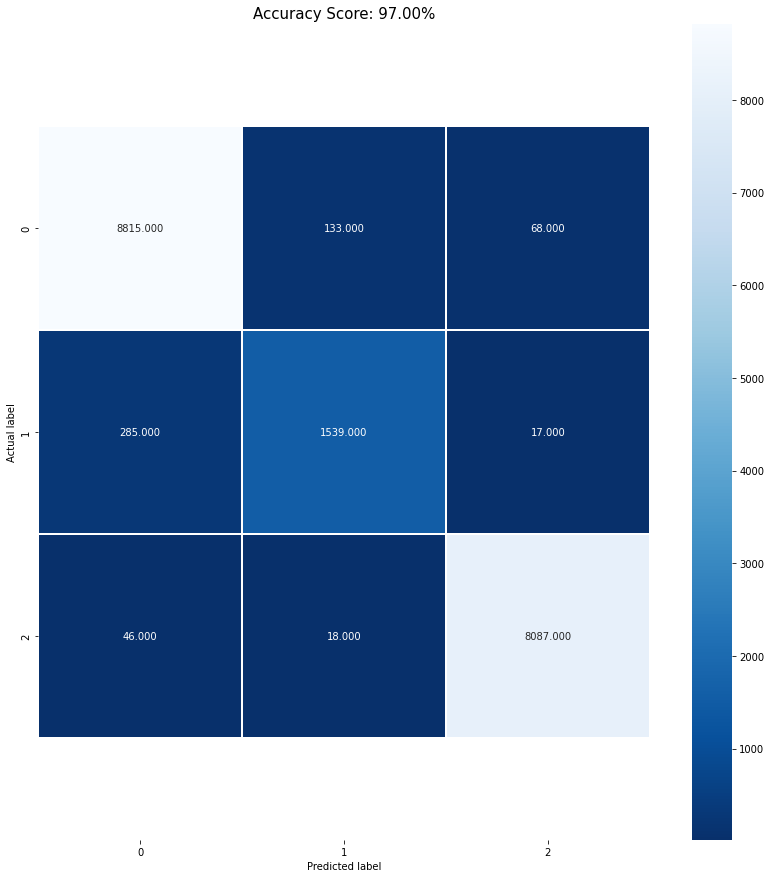

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

predictions = model.predict(vect.transform(X_test))
cm = confusion_matrix(y_test.to_numpy(), predictions)
print(cm)
plt.figure(figsize=(15,15))
ax=sns.heatmap(cm, annot=True, fmt=".3f", linewidths=1, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
ax.set_aspect("equal")
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
all_sample_title = 'Accuracy Score: {:0.2f}%'.format(acc_val[-1]*100)
plt.title(all_sample_title, size = 15);

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.96      0.98      0.97      9016
           0       0.91      0.84      0.87      1841
           1       0.99      0.99      0.99      8151

    accuracy                           0.97     19008
   macro avg       0.95      0.94      0.94     19008
weighted avg       0.97      0.97      0.97     19008



In [77]:
df['p_score']=model.predict(vect.transform(df.tweet[0:]))
print("Total Predicted tweets",len(df))

Total Predicted tweets 76031


In [78]:
df.to_csv('sentiment.csv', index=False, encoding="utf-8")
print("Data Written to sentiment.csv file...")

Data Written to sentiment.csv file...


In [83]:
import pandas as pd
import numpy as np
import csv
import re #regular expression
from textblob import TextBlob
import string
!pip install preprocessor

import preprocessor as p
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import datetime
import calendar


  Created wheel for preprocessor: filename=preprocessor-1.1.3-py3-none-any.whl size=4477 sha256=b2adbbac105023b39edf6b1e5fa0dcc53b856bf43e3810c9f3bd9dfd80400064
  Stored in directory: /root/.cache/pip/wheels/0e/b7/36/aa37256db62b4bfd35a6f1b5536e9ba843f257b79dcbf3d5f1
Successfully built preprocessor


In [80]:
!pip install processor

     |████████████████████████████████| 113 kB 3.2 MB/s 
     |████████████████████████████████| 83 kB 1.1 MB/s 
     |████████████████████████████████| 66 kB 3.0 MB/s 
  Created wheel for processor: filename=processor-0.10.0-py2.py3-none-any.whl size=19805 sha256=f1dd3de04cf125d9cfa50723d8d5b382abd7871da8fe7b5c80e705b4990e2569
  Stored in directory: /root/.cache/pip/wheels/29/0b/fe/c846f78fed56d15ed56801ead24d9126a765c73c0893bd2ee5
  Created wheel for twiggy-goodies: filename=twiggy_goodies-0.12.0-py3-none-any.whl size=8769 sha256=0cdb1700600451369b279ca192cc7da40a3426930447771ecc58743fa8118b26
  Stored in directory: /root/.cache/pip/wheels/4c/d5/e0/a6a1de620ef712e90fb86a29ee37b5c72f44184e1bec198305
  Created wheel for twiggy: filename=Twiggy-0.4.7-py3-none-any.whl size=23521 sha256=f306cb47c66cfb4129ee8a66b61927a848d5f7fa606632159e32b9f8ac846daf
  Stored in directory: /root/.cache/pip/wheels/36/49/62/fe9db23101b7e1704479f03d3a715a9bbdb895f5f074f4d31a
  Created wheel for funcparserlib

In [84]:
df = pd.read_csv('sentiment.csv')
total=df['p_score'].count()
p=df[df['p_score']== 1 ].count()
nt=df[df['p_score']==0].count()
n=df[df['p_score']== -1 ].count()
print("positive %: ",(p['p_score']/total)*100)
print("neutral %: ",(nt['p_score']/total)*100)
print("negative %: ",(n['p_score']/total)*100)

positive %:  43.525667162078626
neutral %:  8.941089818626613
negative %:  47.533243019294765


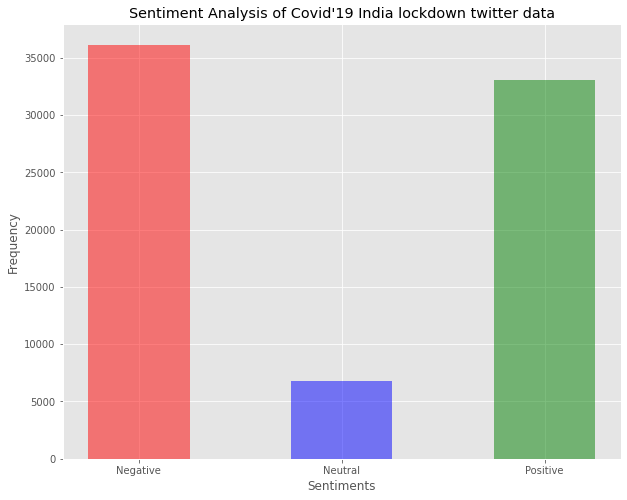

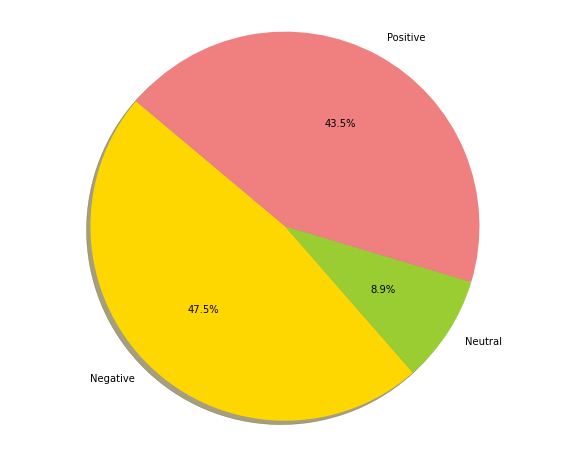

In [85]:
## plotting the data based on the count of positive , negative and neutral feedback
width = 0.50  
ind = np.arange(4) 
df2 = df.groupby(df["p_score"],as_index=False).count()
plt.style.use('ggplot')
plt.figure(figsize=(10,8))
plt.bar(["Negative","Neutral","Positive"],df2["hashtags"],width,alpha=0.5 ,color = ["red","blue","green"])
plt.title("Sentiment Analysis of Covid'19 India lockdown twitter data") 
plt.ylabel("Frequency")
plt.xlabel("Sentiments")
plt.show()

#pie plot
labels = 'Negative', 'Neutral', 'Positive'
sizes = []
sizes = df2["id"].tolist()
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plot
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

ax1.axis('equal')
plt.show()



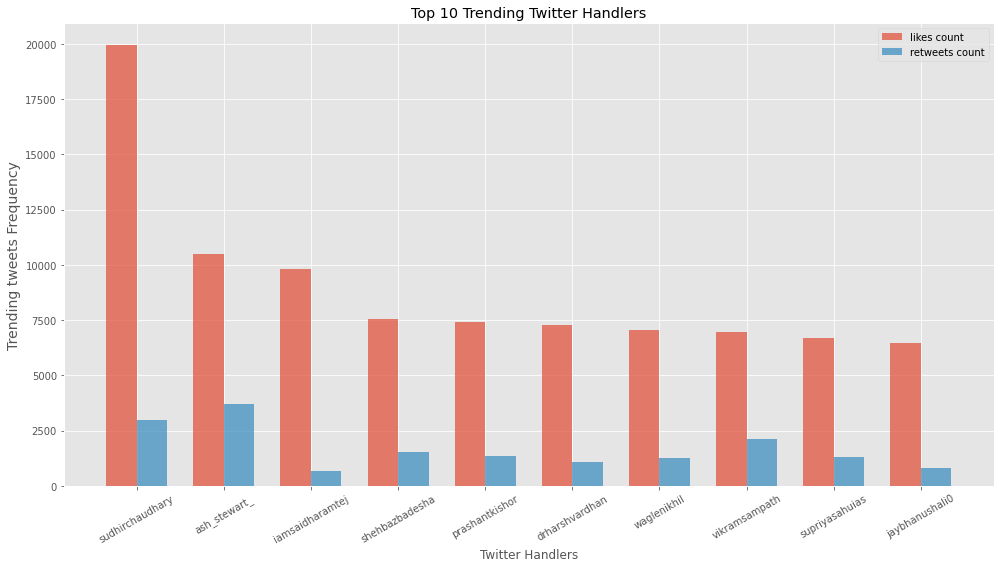

In [86]:
df = pd.read_csv('sentiment.csv')
dataframe = df[df.likes_count>0]
trending_tweets = dataframe.sort_values(by=['likes_count','retweets_count'], ascending=False).head(10)
trending_tweets

## plotting top 10 trending tweets
likes_count = []
retweets_count = []
replies_count = []
username = []
 
likes_count = trending_tweets['likes_count'].tolist()
retweets_count = trending_tweets['retweets_count'].tolist()
replies_count = trending_tweets['replies_count'].tolist()
username = trending_tweets['username'].tolist()

x = np.arange(len(username))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width/2, likes_count, width, label='likes count',alpha=0.7 )
rects2 = ax.bar(x + width/2, retweets_count, width, label='retweets count',alpha=0.7 )

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Trending tweets Frequency',fontsize=14)
ax.set_xlabel('Twitter Handlers')
ax.set_title('Top 10 Trending Twitter Handlers')
ax.set_xticks(x)
ax.set_xticklabels(username ,rotation=30,fontsize=10)
ax.legend()
fig.tight_layout()
plt.show()


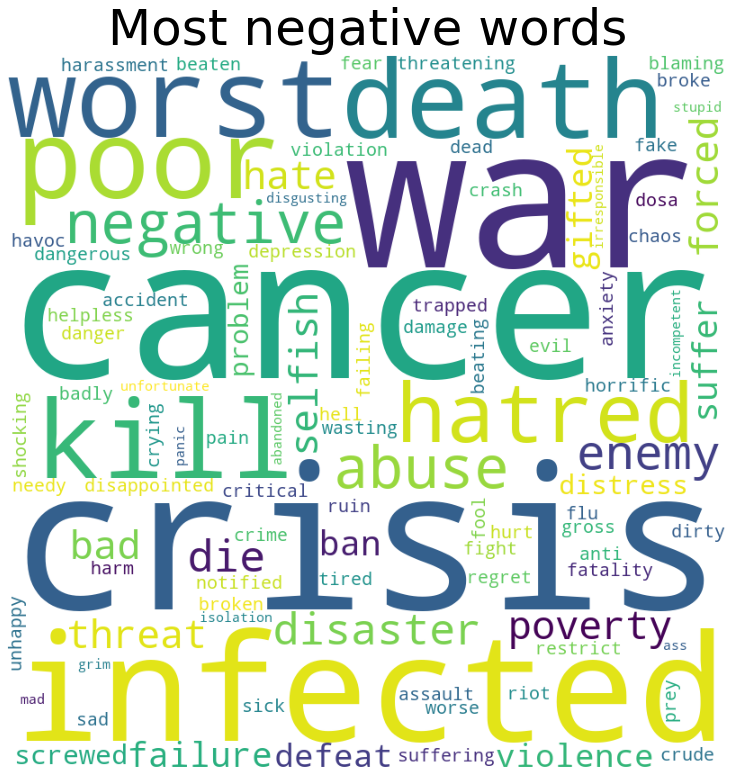

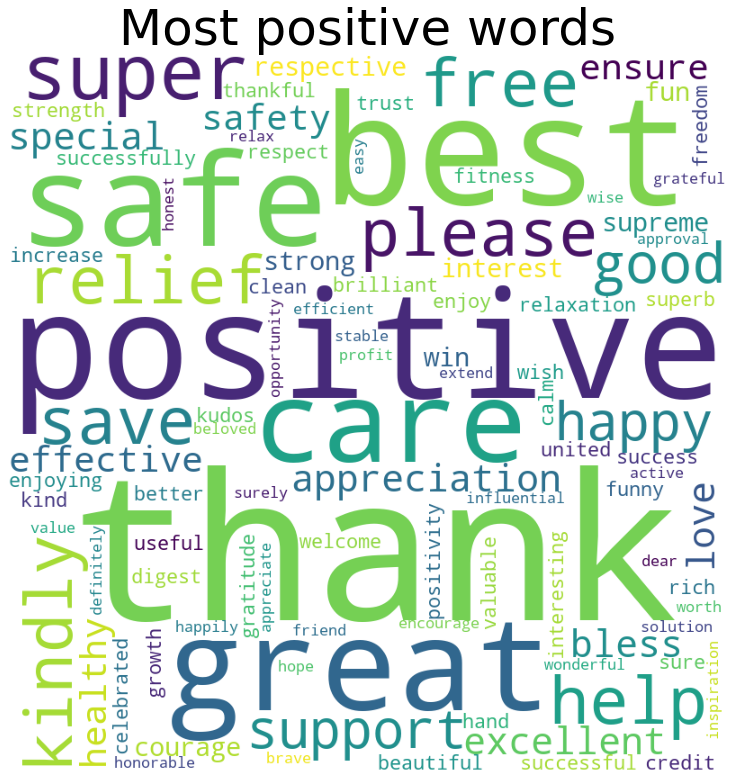

In [87]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def PlotWordCloud(words, title):
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white' 
                ).generate(words) 
                                                           
    # plot the WordCloud image                        
    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title, fontsize=50)

    plt.show() 
negative = ''
for word in feature_names[sorted_coef_index[:-101:-1]]:
    negative += word + ' '
PlotWordCloud(negative, 'Most negative words')

positive = ''
for word in feature_names[sorted_coef_index[:100]]:
    positive += word + ' '    
PlotWordCloud(positive, 'Most positive words')


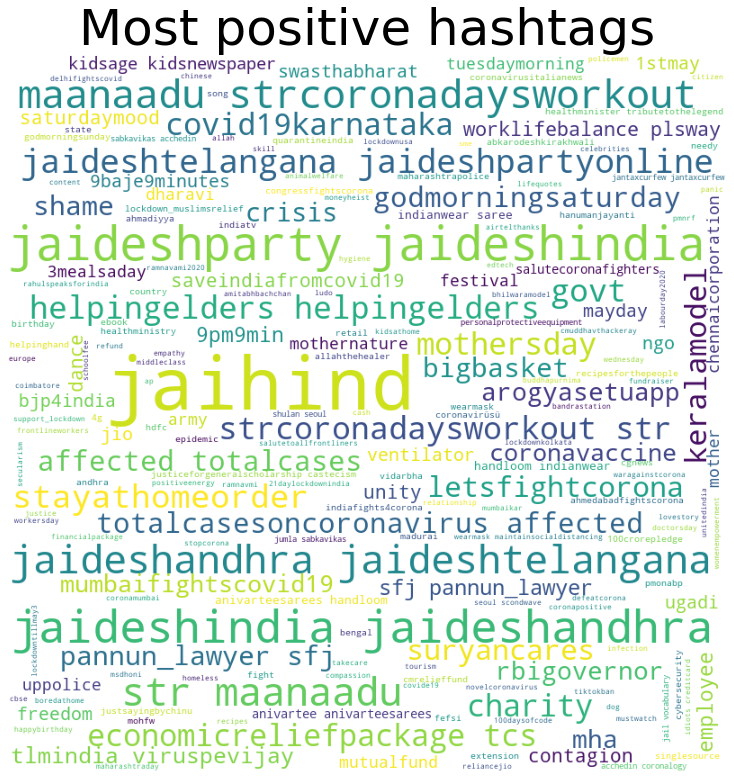

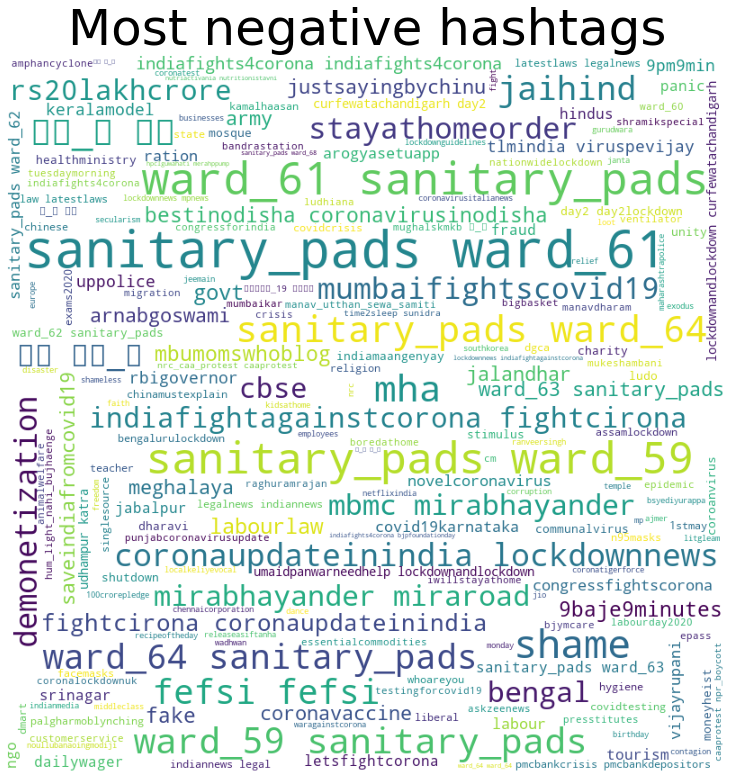

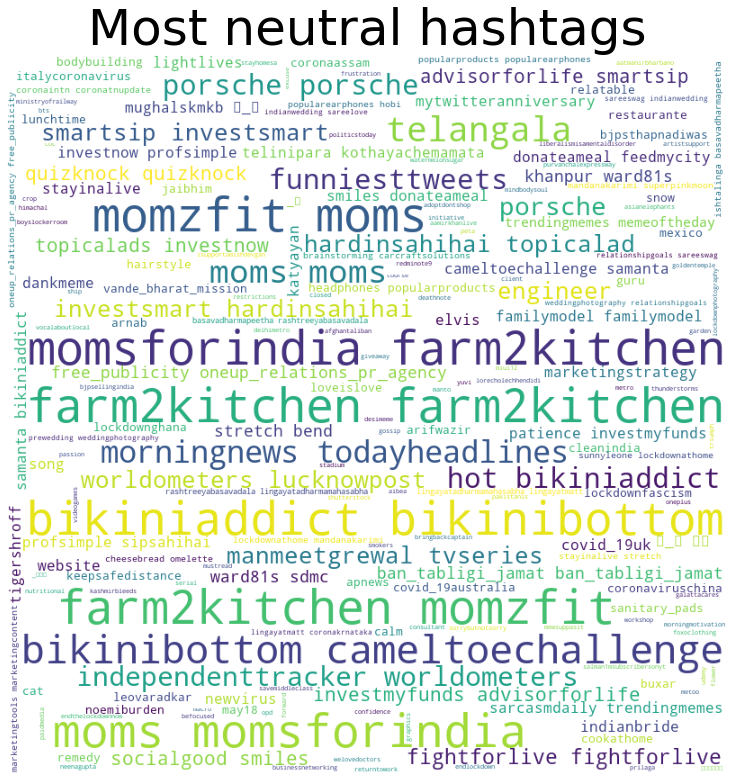

In [88]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import itertools
import collections

df= pd.read_csv('sentiment.csv')
df['hashtags'] = df['hashtags'].str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')
neg_hastags=df[df['p_score']==-1]
pos_hastags=df[df['p_score']==1]
nt_hastags=df[df['p_score']==0]
from wordcloud import WordCloud


pos=""
neg=""
nt=""
for i in pos_hastags.hashtags:
    pos+=i+" "
for i in neg_hastags.hashtags:
    neg+=i+" "
for i in nt_hastags.hashtags:
    nt+=i+" "
#print(s)

psplit=pos.split()
nsplit=neg.split()
ntsplit=nt.split()
common=set(psplit) & set(nsplit) & set(ntsplit)

phashtag  = [word for word in psplit if word not in common]
phashtag = ' '.join(phashtag)
nhashtag  = [word for word in nsplit if word not in common]
nhashtag = ' '.join(nhashtag)
nthashtag  = [word for word in ntsplit if word not in common]
nthashtag = ' '.join(nthashtag)
# lower max_font_size, change the maximum number of word and lighten the background:
def PlotWordCloud(words, title):
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white' 
                ).generate(words) 
                                                           
    # plot the WordCloud image                        
    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title, fontsize=50)

    plt.show() 
    
    
PlotWordCloud(phashtag, 'Most positive hashtags')
PlotWordCloud(nhashtag, 'Most negative hashtags')
PlotWordCloud(nthashtag, 'Most neutral hashtags')

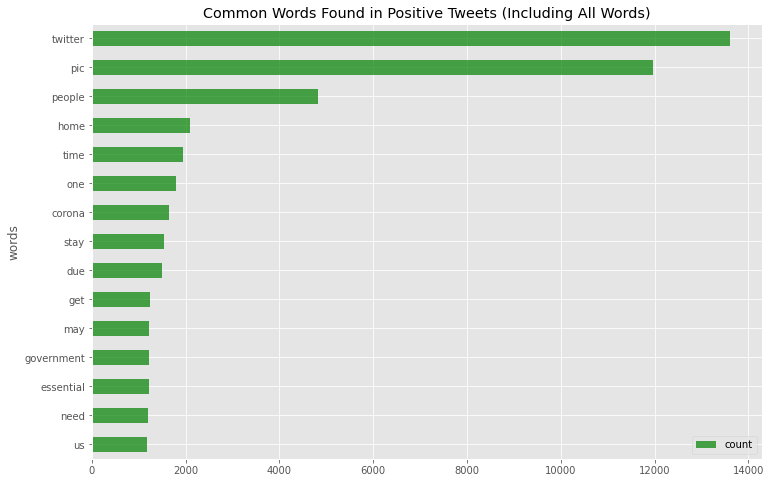

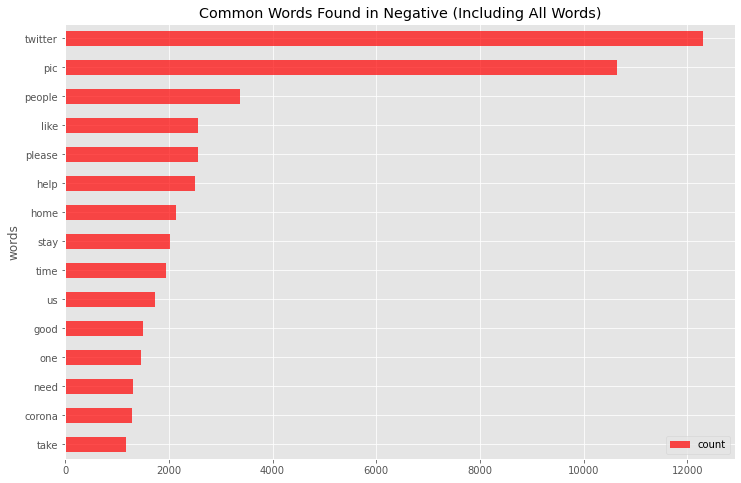

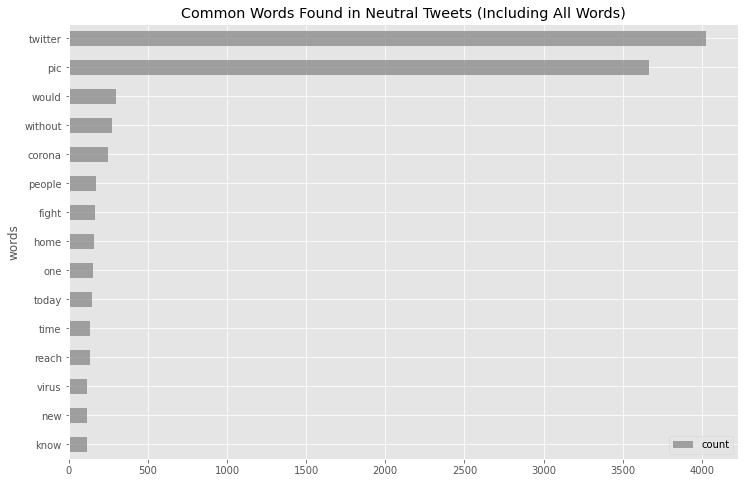

In [89]:
words_in_neg_tweet = [tweet.lower().split() for tweet in pos_hastags.tweet]
words_in_pos_tweet = [tweet.lower().split() for tweet in neg_hastags.tweet]
words_in_nt_tweet = [tweet.lower().split() for tweet in nt_hastags.tweet]

neg_words_no_urls = list(itertools.chain(*words_in_neg_tweet))
pos_words_no_urls = list(itertools.chain(*words_in_pos_tweet))
nt_words_no_urls = list(itertools.chain(*words_in_nt_tweet))

counts_no_neg = collections.Counter(neg_words_no_urls)
counts_no_pos = collections.Counter(pos_words_no_urls)
counts_no_nt = collections.Counter(nt_words_no_urls)

clean_tweets_no_pos = pd.DataFrame(counts_no_pos.most_common(15),
                             columns=['words', 'count'])
clean_tweets_no_neg = pd.DataFrame(counts_no_neg.most_common(15),
                             columns=['words', 'count'])
clean_tweets_no_nt = pd.DataFrame(counts_no_nt.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(12, 8))

# Plot horizontal bar graph
clean_tweets_no_pos.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="green", alpha=0.7)
ax.set_title("Common Words Found in Positive Tweets (Including All Words)")
plt.show()
fig, ax = plt.subplots(figsize=(12, 8))
clean_tweets_no_neg.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="red", alpha=0.7)
ax.set_title("Common Words Found in Negative (Including All Words)")
plt.show()
fig, ax = plt.subplots(figsize=(12, 8))
clean_tweets_no_nt.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="grey", alpha=0.7)
ax.set_title("Common Words Found in Neutral Tweets (Including All Words)")
plt.show() 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


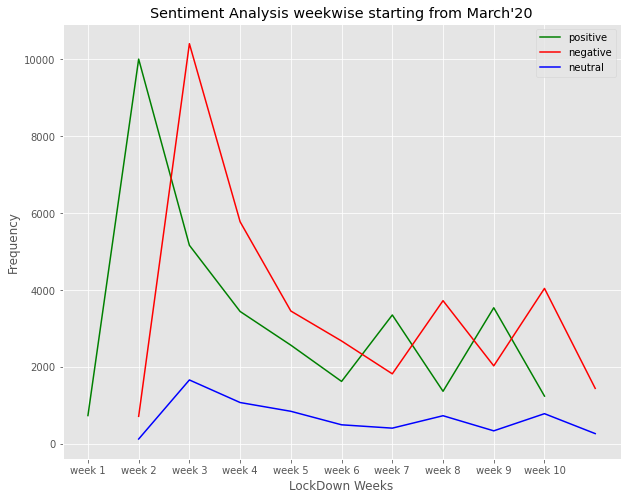

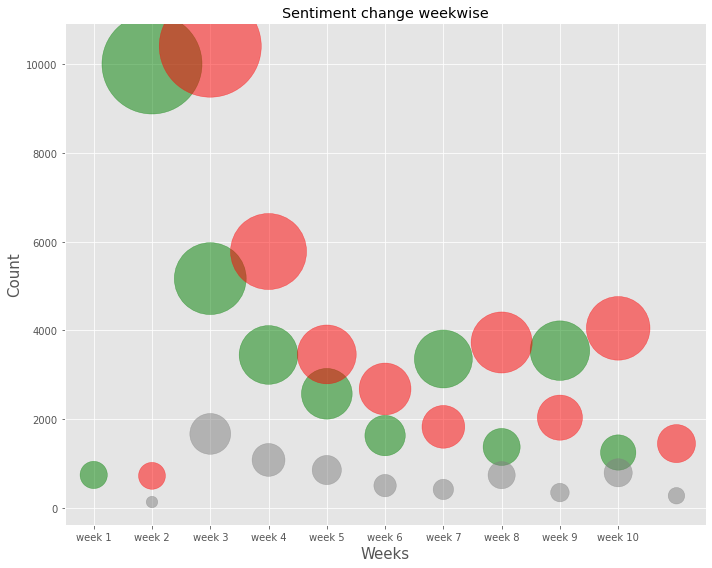

In [90]:
df = pd.read_csv('sentiment.csv')
df["date"] = pd.to_datetime(df["date"])
df["counter"] = 1;
df["week"] = df['date'].dt.week
df['week'] = df['week']-11

df4 = df[["p_score","week","id"]].groupby(["p_score","week"],as_index = False).count()
p_df = df4[df4["p_score"] == 1 ]
p_df['week'] = "week "+ p_df['week'].astype(str)

n_df = df4[df4["p_score"] == -1]
nn_df = df4[df4["p_score"] == 0]
plt.subplots(1, figsize=(10, 8))
plt.plot(p_df["week"],p_df["id"],color="green")
plt.plot(n_df["week"],n_df["id"],color="red")
plt.plot(nn_df["week"],nn_df["id"],color="blue")
plt.legend(["positive", "negative","neutral"])
plt.title("Sentiment Analysis weekwise starting from March'20")
plt.xlabel("LockDown Weeks")
plt.ylabel("Frequency")
plt.show()

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook



fig, ax = plt.subplots(1, figsize=(10, 8))

ax.scatter(p_df["week"],p_df["id"],color="green" , s=p_df["id"], alpha=0.5)
ax.scatter(n_df["week"],n_df["id"], color="red" ,s=n_df["id"],  alpha=0.5)
ax.scatter(nn_df["week"],nn_df["id"], color="grey",  s=nn_df["id"], alpha=0.5)

ax.set_xlabel('Weeks', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Sentiment change weekwise')

ax.grid(True)
fig.tight_layout()

plt.show()

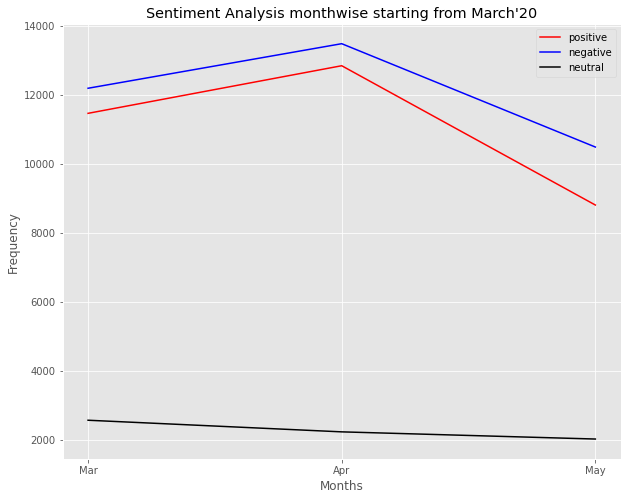

6    Apr
7    Mar
8    May
Name: month, dtype: object 3


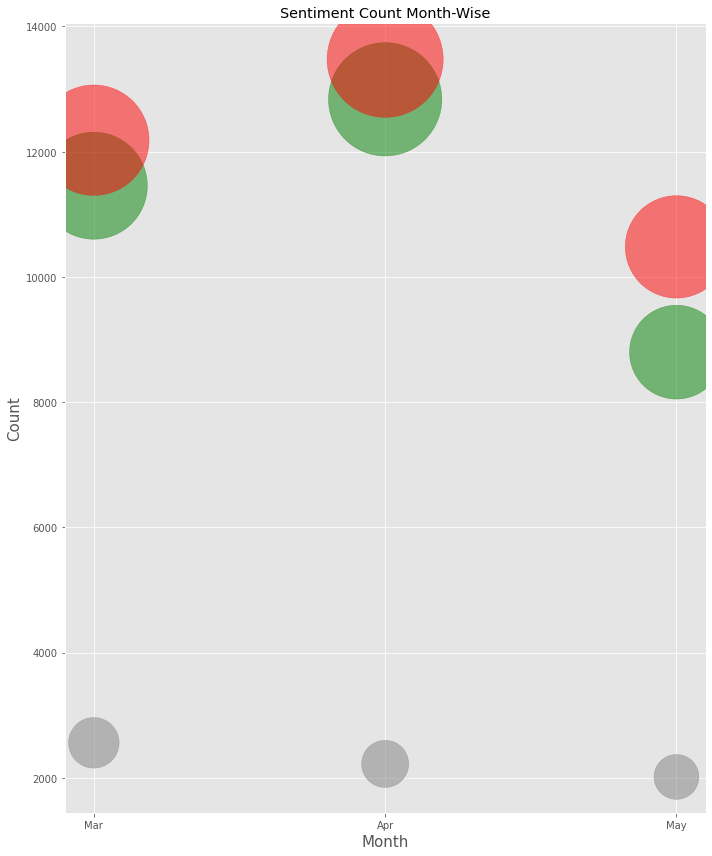

In [91]:
#load data
df = pd.read_csv('sentiment.csv')
df['datenew']=df['date']
df["datenew"] = pd.to_datetime(df["datenew"]).dt.strftime("%Y-%m-%d")
df = df.sort_values(by='datenew', ascending=True)
df["month"] = pd.DatetimeIndex(df["datenew"]).month
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])
df3 = df[["p_score","month","id"]].groupby(['p_score','month'],as_index=False).count()
positive = df3[df3["p_score"] == 1 ]
negative = df3[df3["p_score"] == -1]
neutral = df3[df3["p_score"] == 0]

#line plot
fig = plt.subplots(1, figsize=(10, 8))
plt.plot(['Mar','Apr','May'],positive["id"],color="red")
plt.plot(['Mar','Apr','May'],negative["id"],color="blue")
plt.plot(['Mar','Apr','May'],neutral["id"],color="black")
plt.legend(["positive", "negative","neutral"])
plt.title("Sentiment Analysis monthwise starting from March'20")
plt.xlabel("Months")
plt.ylabel("Frequency")
plt.show()

#scatter plot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
fig, ax = plt.subplots(1, figsize=(10,12))
print(positive["month"],len(neutral["id"]))
ax.scatter(['Mar','Apr','May'],positive["id"],color="green" , s=positive["id"], alpha=0.5)
ax.scatter(['Mar','Apr','May'],negative["id"], color="red" ,s=negative["id"],  alpha=0.5)
ax.scatter(['Mar','Apr','May'],neutral["id"], color="grey",  s=neutral["id"], alpha=0.5)

ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Sentiment Count Month-Wise')

ax.grid(True)
fig.tight_layout()
plt.show()

